<a href="https://www.kaggle.com/code/ndohmoise/build-an-app-for-public-health-1?scriptVersionId=150828852" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#permet d'identifier les valeurs manquantes par dessin avant l'apprentissage automatique
import missingno as msno
#permet d'imputer afin de compléter les valeurs manquantes à l'aide des k-voisins les plus proches
from sklearn.impute import KNNImputer
#permet l'analyse des donnéees statistiques
from scipy.stats import pearsonr
#il s'agit d'un estimateur qui permet de standardiser les données
from sklearn.experimental import enable_iterative_imputer
#il permet de standardiser les données
from sklearn.impute import IterativeImputer
#il permet de standardiser les données avec la fonction minmax ((x-xmin)/(xmin-xmax))
from sklearn.preprocessing import MinMaxScaler
#gestion avec knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data_food = pd.read_csv('/kaggle/input/fropenfoodfactsorg-2020/fr.openfoodfacts.org.products.csv', sep='\t')
data_food

/tmp/ipykernel_20/560133198.py:1: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data_food = pd.read_csv('/kaggle/input/fropenfoodfactsorg-2020/fr.openfoodfacts.org.products.csv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-fr.openfoodfacts.org/produit/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-fr.openfoodfacts.org/produit/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146390,9999999175305,http://world-fr.openfoodfacts.org/produit/9999...,sil,1577002381,2019-12-22T08:13:01Z,1577083824,2019-12-23T06:50:24Z,Erdbeerkuchen 1019g tiefgefroren,NaN,"1,019 kg",...,NaN,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1146391,99999995,http://world-fr.openfoodfacts.org/produit/9999...,kiliweb,1538818432,2018-10-06T09:33:52Z,1552167501,2019-03-09T21:38:21Z,Steak haché pur boeuf,NaN,NaN,...,NaN,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1146392,9999999900686,http://world-fr.openfoodfacts.org/produit/9999...,kiliweb,1563261470,2019-07-16T07:17:50Z,1563261481,2019-07-16T07:18:01Z,Marrons glacés,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1146393,9999999910128,http://world-fr.openfoodfacts.org/produit/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#mise en place de la fontion pourcentage des données
def pourcentage(data):
  n = data.shape[0]
  ret = pd.DataFrame(data.isnull().sum(), columns=['nb_manquants'])
  ret['pourcentage_manquant'] = (ret['nb_manquants']/n)*100
  ret['types'] = data.dtypes
  ret['doublons'] = data.duplicated()
  return ret

In [4]:
#déterminons la taille
data_food.shape

(1146395, 178)

In [5]:
#voyons les tendances de données manquantes
pourcentage(data_food)

,nb_manquants,pourcentage_manquant,types,doublons
code,0,0.000000,object,NaN
url,0,0.000000,object,NaN
creator,4,0.000349,object,NaN
created_t,0,0.000000,int64,NaN
created_datetime,1,0.000087,object,NaN
...,...,...,...,...
choline_100g,1146358,99.996772,float64,NaN
phylloquinone_100g,1146388,99.999389,float64,NaN
beta-glucan_100g,1146373,99.998081,float64,NaN
inositol_100g,1146356,99.996598,float64,NaN


In [6]:
#nous remarquons qu'il y'a énormément de variables avec des valeurs manquantes
#séparons d'abord les données quantitatives
data_food_num = data_food.select_dtypes(include=['float64', 'int64'])

In [7]:
#séparons les données qualitatives
data_food_string = data_food.select_dtypes(include=['O'])

In [8]:
#affichons les colonnes des nouvelles variables
#variables quantitatives
data_food_num.columns

Index(['created_t', 'last_modified_t', 'cities', 'allergens_fr',
       'serving_quantity', 'no_nutriments', 'additives_n',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_n',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=122)

In [9]:
#affichons les colonnes des nouvelles variables quantitatives
data_food_string.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'generic_name', 'quantity', 'packaging',
       'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'origins', 'origins_tags',
       'manufacturing_places', 'manufacturing_places_tags', 'labels',
       'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags',
       'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores',
       'countries', 'countries_tags', 'countries_fr', 'ingredients_text',
       'allergens', 'traces', 'traces_tags', 'traces_fr', 'serving_size',
       'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_grade',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url',
       'image_ingredients_url', 'imag

In [10]:
data_food.isna().sum()

code                        0
url                         0
creator                     4
created_t                   0
created_datetime            1
                       ...   
choline_100g          1146358
phylloquinone_100g    1146388
beta-glucan_100g      1146373
inositol_100g         1146356
carnitine_100g        1146378
Length: 178, dtype: int64

In [11]:
#cherchons les variables avec le plus de valeurs manquantes
def null_factor(df, tx):
    null_rate = ((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False).reset_index()
    null_rate.columns = ['Variable','Taux_de_Null']
    high_null_rate = null_rate[null_rate.Taux_de_Null >= tx]
    return high_null_rate

In [12]:
#affichons les variables avec 100% de valeurs manquantes
null_factor(data_food, 100)

,Variable,Taux_de_Null
0,mead-acid_100g,100.0
1,erucic-acid_100g,100.0
2,ingredients_that_may_be_from_palm_oil,100.0
3,gondoic-acid_100g,100.0
4,elaidic-acid_100g,100.0
5,no_nutriments,100.0
6,water-hardness_100g,100.0
7,nervonic-acid_100g,100.0
8,melissic-acid_100g,100.0
9,allergens_fr,100.0


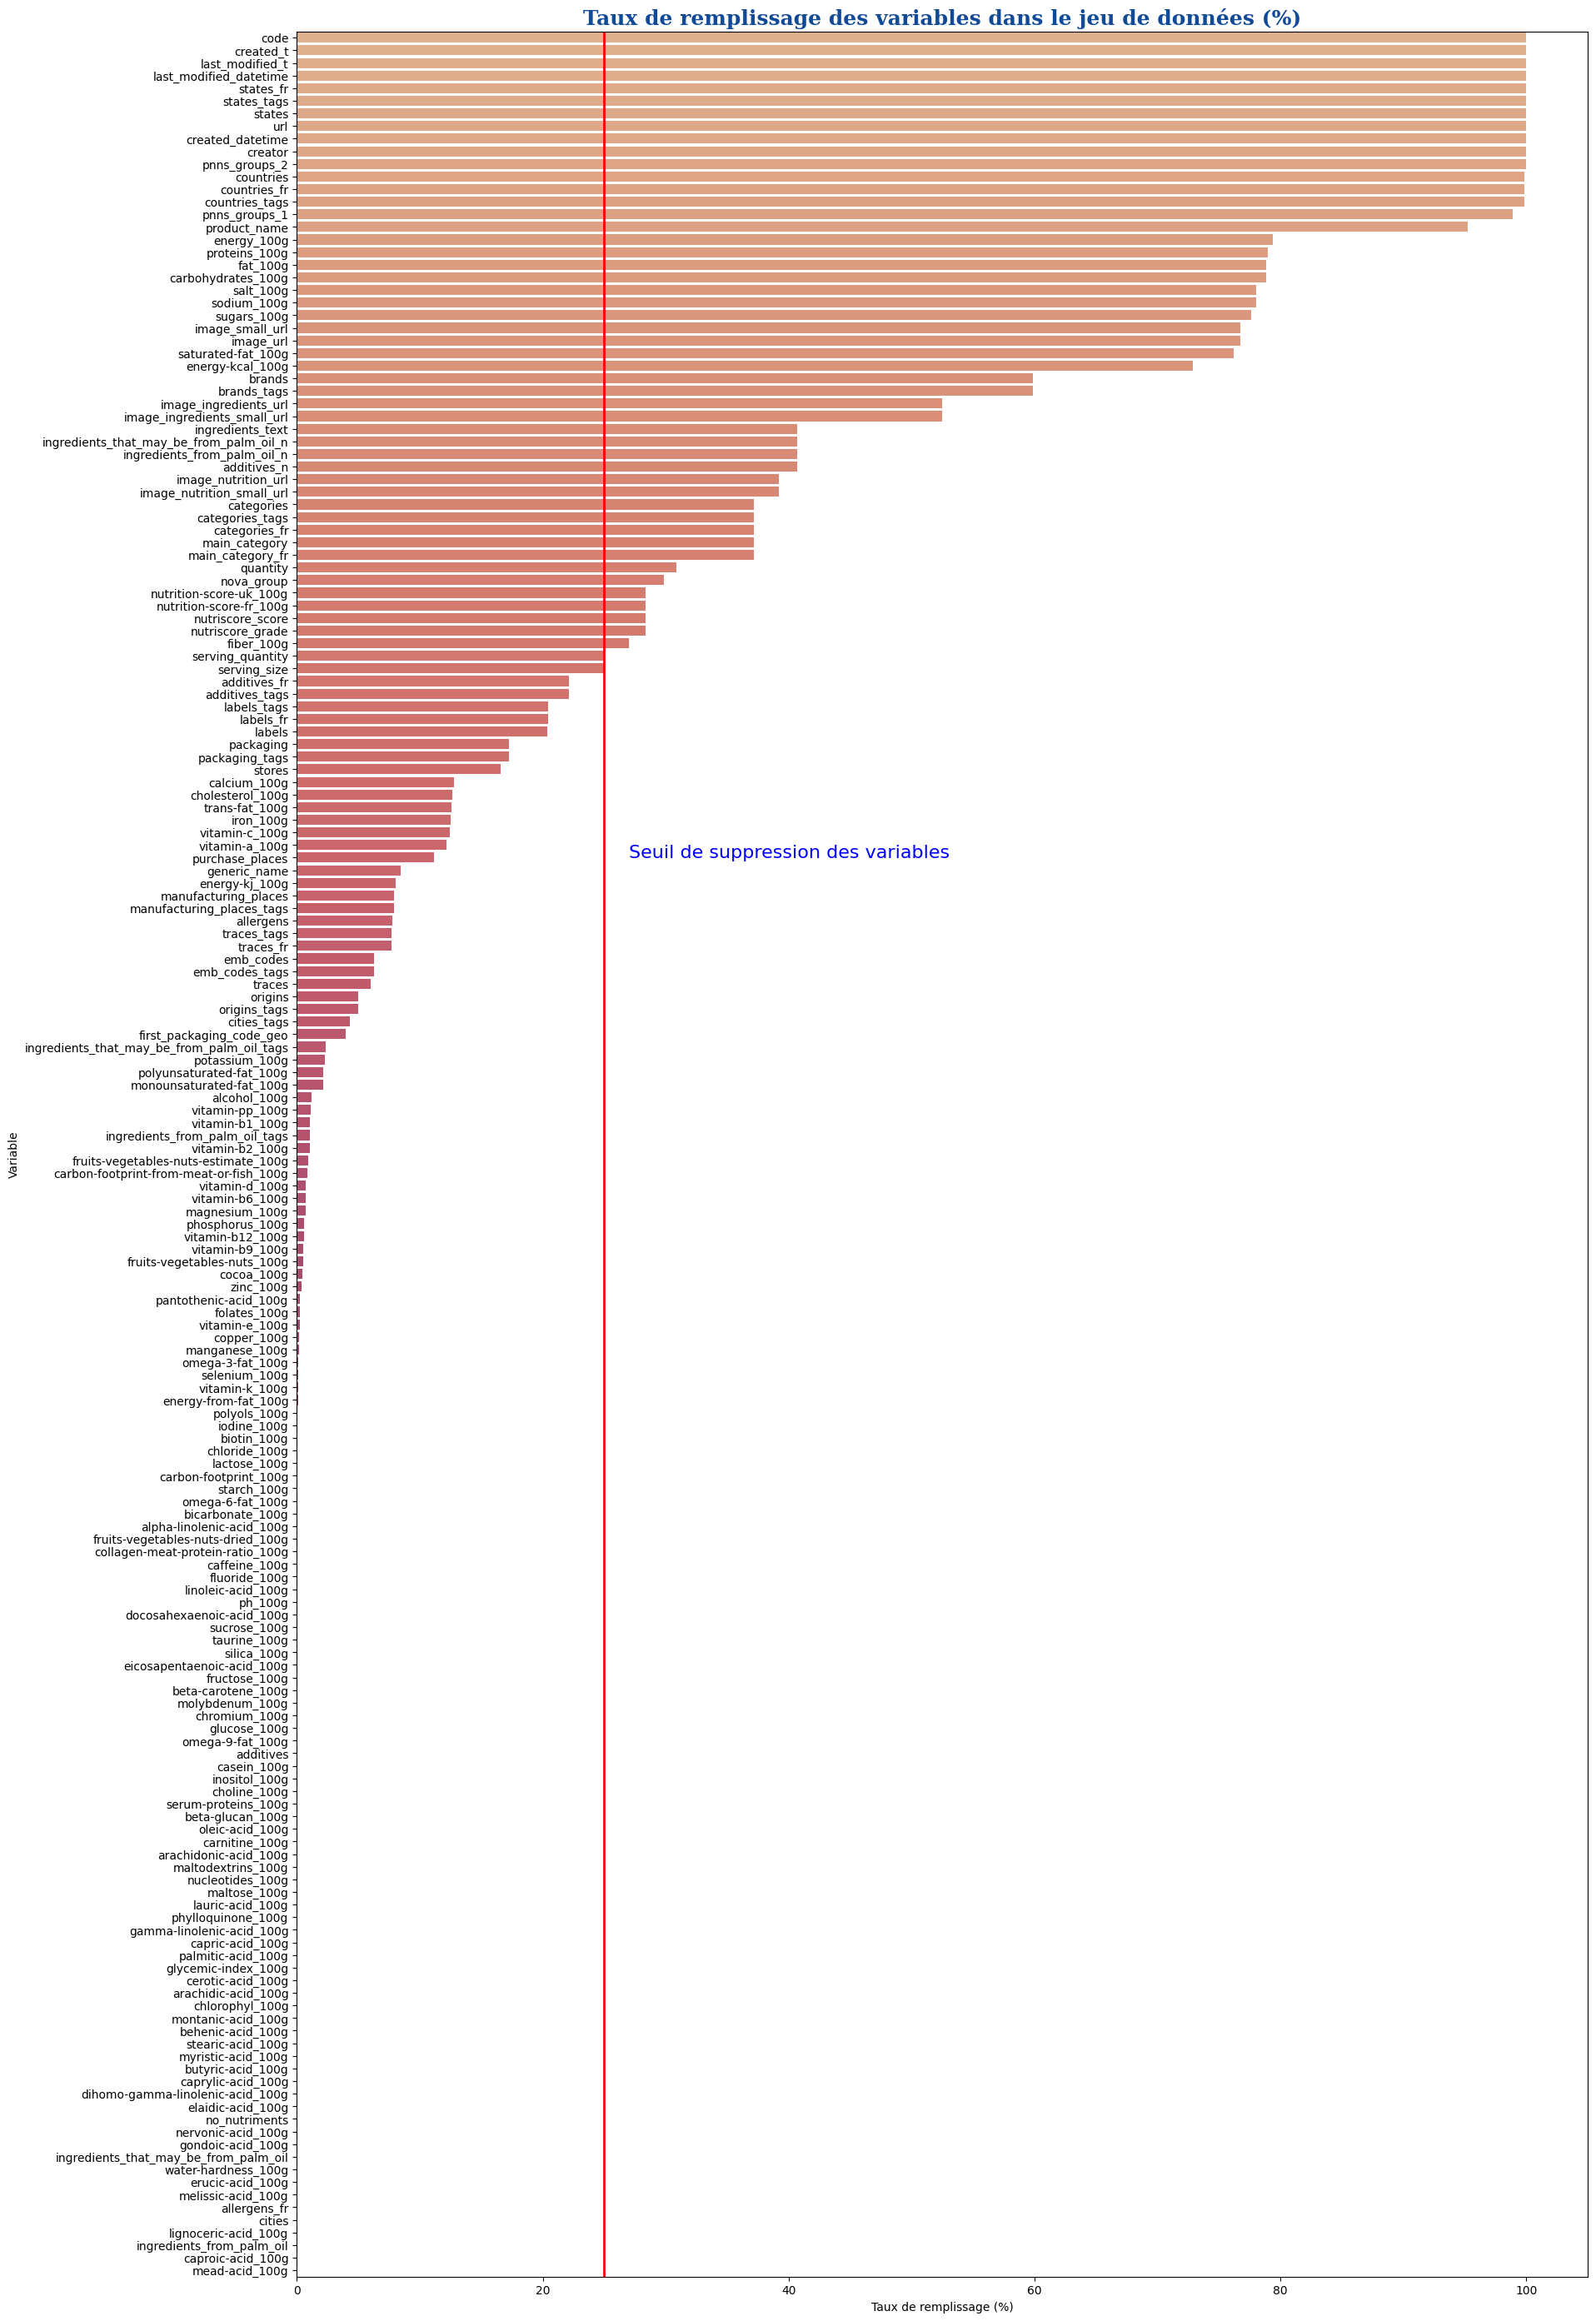

In [13]:
#Affichons le taux de remplissage des variables et afin d'avoir un jeu de données pertinent pour notre analyse,
#nous décidons de ne considérer que les variables ayant un taux de remplissage supérieur ou egal à 25%.
filling_features = null_factor(data_food, 0)
filling_features["taux_de_remplissage"] = 100-filling_features['Taux_de_Null']
filling_features = filling_features.sort_values("taux_de_remplissage", ascending=False)

#définition du seuil
sup_threshold = 25
fig = plt.figure(figsize=(20, 35))
font_title = {'family': 'serif',
              'color': '#114b98',
              'weight': 'bold',
              'size': 18,
              }

sns.barplot(x='taux_de_remplissage', y='Variable', data=filling_features, palette="flare")

#seuil pour suppression des variables
plt.axvline(x=sup_threshold, linewidth=2, color='r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize="16", color='b')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

In [14]:
#mettons donc en place la liste des varialbles à conserver
features_to_conserve = list(filling_features.loc[filling_features['taux_de_remplissage']>=sup_threshold, 'Variable'].values)
data_food_25 = data_food[features_to_conserve].sort_values(["created_datetime","last_modified_datetime"], ascending=True)
data_food_25.columns

Index(['code', 'created_t', 'last_modified_t', 'last_modified_datetime',
       'states_fr', 'states_tags', 'states', 'url', 'created_datetime',
       'creator', 'pnns_groups_2', 'countries', 'countries_fr',
       'countries_tags', 'pnns_groups_1', 'product_name', 'energy_100g',
       'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g',
       'sodium_100g', 'sugars_100g', 'image_small_url', 'image_url',
       'saturated-fat_100g', 'energy-kcal_100g', 'brands', 'brands_tags',
       'image_ingredients_url', 'image_ingredients_small_url',
       'ingredients_text', 'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'image_nutrition_url',
       'image_nutrition_small_url', 'categories', 'categories_tags',
       'categories_fr', 'main_category', 'main_category_fr', 'quantity',
       'nova_group', 'nutrition-score-uk_100g', 'nutrition-score-fr_100g',
       'nutriscore_score', 'nutriscore_grade', 'fiber_100g'],
      dtype='obj

In [15]:
#cherchons les doublons pour chaque variable des 50 restants
data_food_25.duplicated().sum()

65

In [16]:
#supprimons les doublons en conservant les valeurs nulles
data_food_25 = data_food_25[~(data_food_25.duplicated('code',keep='last')) | (data_food_25['code'].isnull())]
data_food_25.duplicated().sum()

0

In [17]:
#Conservons les features nutritionnelles et catégorielles des produits utiles à notre problématique
data_food_25=data_food_25[[ 'code','product_name', 'countries_fr', 'energy_100g', 'fat_100g','saturated-fat_100g', 
                       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
                       'nutriscore_grade','nutrition-score-fr_100g']]

In [18]:
#ajoutons les features catégorielles utiles pour catégoriser les produits 
data_food_25['pnns_groups_1']=data_food['pnns_groups_1']
data_food_25['pnns_groups_2']=data_food['pnns_groups_2']

En rapport avec notre problématique(diabétique résident en France nous allons considérer que les produits qu'on pourra trouver en France:

In [19]:
choosen_France = data_food_25['countries_fr'].str.contains('France', case=False, na=False)
data_food_25['countries_fr'] = data_food_25[choosen_France]['countries_fr']
data_food_25 = data_food_25[~((data_food_25.countries_fr.isnull()))]

Un aperçu de la variable countries_fr:

In [20]:
data_food_25['countries_fr'].head()

645238                                      France
372552                                      France
446595                                      France
396289                                      France
944480    Belgique,France,Italie,Luxembourg,Suisse
Name: countries_fr, dtype: object

**Les catégories de produits**

In [21]:
#Affichons les catégories présntes dans pnns_groups_1 et pnns_groups_2
data_food_25['pnns_groups_1'].unique()

array(['Sugary snacks', 'Salty snacks', 'Beverages', 'Fish Meat Eggs',
       'Milk and dairy products', 'Cereals and potatoes',
       'Fruits and vegetables', 'Fat and sauces', 'Composite foods',
       'unknown', nan, 'sugary-snacks', 'fruits-and-vegetables',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [22]:
#Affichons les catégories présntes dans pnns_groups_1 et pnns_groups_2
data_food_25['pnns_groups_2'].unique()

array(['Sweets', 'Appetizers', 'Biscuits and cakes',
       'Waters and flavored waters', 'Chocolate products',
       'Fish and seafood', 'Processed meat', 'Cheese', 'Fruit juices',
       'Cereals', 'Sweetened beverages', 'Dried fruits', 'Eggs', 'Fats',
       'One-dish meals', 'Bread', 'Dressings and sauces', 'Legumes',
       'Milk and yogurt', 'unknown', 'Salty and fatty products',
       'Ice cream', 'Alcoholic beverages', 'Fruits', 'Soups',
       'Plant-based milk substitutes', 'Vegetables', 'Breakfast cereals',
       'Pizza pies and quiche', 'Potatoes',
       'Artificially sweetened beverages', 'Unsweetened beverages',
       'Nuts', 'pastries', 'vegetables', 'Meat', 'Dairy desserts',
       'Pizza pies and quiches', 'Sandwiches', 'Fruit nectars', 'fruits',
       'Offals', 'Teas and herbal teas and coffees', 'cereals', 'legumes',
       'nuts', nan], dtype=object)

In [23]:
#remplacons les valeurs manquantes par unknow afin d'avoir de pouoir bien caractériser tous les prouduits 
data_food_25.loc[data_food_25['pnns_groups_1'].isna(), 'pnns_groups_1'] = 'unknown'
data_food_25.loc[data_food_25['pnns_groups_2'].isna(), 'pnns_groups_2'] = 'unknown'

In [24]:
#corrigeons les erreurs de formatage
data_food_25["pnns_groups_1"] = data_food_25["pnns_groups_1"].str.lower().str.replace('-', ' ')
data_food_25["pnns_groups_2"] = data_food_25["pnns_groups_2"].str.lower().str.replace('-', ' ')

In [25]:
print("{} catégories sont représentées dans la variable pnns_group_1:".format(len(data_food_25['pnns_groups_1'].unique())))
data_food_25['pnns_groups_1'].unique()

10 catégories sont représentées dans la variable pnns_group_1:


array(['sugary snacks', 'salty snacks', 'beverages', 'fish meat eggs',
       'milk and dairy products', 'cereals and potatoes',
       'fruits and vegetables', 'fat and sauces', 'composite foods',
       'unknown'], dtype=object)

In [26]:
print("{} catégories sont représentées dans la variable pnns_group_2:".format(len(data_food_25['pnns_groups_2'].unique())))
data_food_25['pnns_groups_2'].unique()

41 catégories sont représentées dans la variable pnns_group_2:


array(['sweets', 'appetizers', 'biscuits and cakes',
       'waters and flavored waters', 'chocolate products',
       'fish and seafood', 'processed meat', 'cheese', 'fruit juices',
       'cereals', 'sweetened beverages', 'dried fruits', 'eggs', 'fats',
       'one dish meals', 'bread', 'dressings and sauces', 'legumes',
       'milk and yogurt', 'unknown', 'salty and fatty products',
       'ice cream', 'alcoholic beverages', 'fruits', 'soups',
       'plant based milk substitutes', 'vegetables', 'breakfast cereals',
       'pizza pies and quiche', 'potatoes',
       'artificially sweetened beverages', 'unsweetened beverages',
       'nuts', 'pastries', 'meat', 'dairy desserts',
       'pizza pies and quiches', 'sandwiches', 'fruit nectars', 'offals',
       'teas and herbal teas and coffees'], dtype=object)

In [27]:
#identifions la taille du jeu de données 
data_food_25

,code,product_name,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_grade,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2
645238,3760029248001,Caramels tendres au beurre salé au sel de Guér...,France,1717.0,10.9,7.0,73.5,49.3,NaN,3.0,1.7000,0.68000,e,28.0,sugary snacks,sweets
372552,3029330062806,Jacquet Les bouchées créatives à garnir,France,1898.0,15.5,1.3,68.0,2.0,3.0,8.5,1.7526,0.70104,c,10.0,salty snacks,appetizers
446595,3257980112590,Boudoirs,France,1615.0,3.2,1.2,80.4,51.8,1.6,6.9,0.0900,0.03600,d,14.0,sugary snacks,biscuits and cakes
396289,3160181210524,Cookies tout chocolat Biocoop,France,2040.0,25.0,14.0,56.0,33.0,5.5,7.0,0.3810,0.15240,e,19.0,sugary snacks,biscuits and cakes
944480,8002270014901,Eau minérale naturelle avec adjonction de gaz ...,"Belgique,France,Italie,Luxembourg,Suisse",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,0.0,beverages,waters and flavored waters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644452,3760025190069,Gwada original,France,88.0,0.0,0.0,5.0,1.3,NaN,0.0,0.0000,0.00000,NaN,NaN,unknown,unknown
622642,3700048100027,Boulettes au boeuf,France,862.0,15.0,5.7,0.7,0.3,NaN,17.0,0.1200,0.04800,NaN,NaN,unknown,unknown
89389,66200021030,Assaisonnement La Grille (poulet De Barbecue),France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
85567,60383993542,Honey mustard,France,837.0,0.0,0.0,40.0,40.0,NaN,4.0,1.2500,0.50000,NaN,NaN,unknown,unknown


**Traitement des valeurs aberrantes**

In [28]:
data_food_aberr = data_food_25.copy()

In [29]:
#Energy_100g
data_food_aberr['energy_100g'].describe()

count    5.265380e+05
mean     1.813984e+03
std      4.763734e+05
min      0.000000e+00
25%      4.690000e+02
50%      1.109000e+03
75%      1.678000e+03
max      3.456712e+08
Name: energy_100g, dtype: float64

En considérant 900kcal (3768.12 kJ) comme valeur énergétique maximale possible pour 100g, toutes les valeurs étant positives,seules celles supérieures à ce seuil seront considérées aberrantes et remplaçées par NaN c'est à dire considerées comme valeurs manquantes.



In [30]:
mask = data_food_aberr['energy_100g'] > 3768.12
data_food_aberr.loc[mask, 'energy_100g'] = np.NaN

In [31]:
data_food_aberr['energy_100g'].describe()

count    525268.000000
mean       1148.134639
std         784.708491
min           0.000000
25%         464.000000
50%        1105.000000
75%        1674.000000
max        3768.000000
Name: energy_100g, dtype: float64

In [32]:
data_food_25

,code,product_name,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_grade,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2
645238,3760029248001,Caramels tendres au beurre salé au sel de Guér...,France,1717.0,10.9,7.0,73.5,49.3,NaN,3.0,1.7000,0.68000,e,28.0,sugary snacks,sweets
372552,3029330062806,Jacquet Les bouchées créatives à garnir,France,1898.0,15.5,1.3,68.0,2.0,3.0,8.5,1.7526,0.70104,c,10.0,salty snacks,appetizers
446595,3257980112590,Boudoirs,France,1615.0,3.2,1.2,80.4,51.8,1.6,6.9,0.0900,0.03600,d,14.0,sugary snacks,biscuits and cakes
396289,3160181210524,Cookies tout chocolat Biocoop,France,2040.0,25.0,14.0,56.0,33.0,5.5,7.0,0.3810,0.15240,e,19.0,sugary snacks,biscuits and cakes
944480,8002270014901,Eau minérale naturelle avec adjonction de gaz ...,"Belgique,France,Italie,Luxembourg,Suisse",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,0.0,beverages,waters and flavored waters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644452,3760025190069,Gwada original,France,88.0,0.0,0.0,5.0,1.3,NaN,0.0,0.0000,0.00000,NaN,NaN,unknown,unknown
622642,3700048100027,Boulettes au boeuf,France,862.0,15.0,5.7,0.7,0.3,NaN,17.0,0.1200,0.04800,NaN,NaN,unknown,unknown
89389,66200021030,Assaisonnement La Grille (poulet De Barbecue),France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
85567,60383993542,Honey mustard,France,837.0,0.0,0.0,40.0,40.0,NaN,4.0,1.2500,0.50000,NaN,NaN,unknown,unknown


**Liste des produits dont les valeurs doivent être comprises entre 0 et 100g**

In [33]:
list_100g=['fat_100g','saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
           'salt_100g','sodium_100g']
list_100g

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [34]:
data_food_aberr[list_100g].describe()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,522448.000000,523224.000000,522251.000000,523545.000000,127100.000000,524788.000000,515408.000000,515402.000000
mean,14.014720,5.416390,27.431131,13.989972,3.036715,8.717708,1.297003,0.518949
std,17.400267,11.116678,30.919240,20.221968,7.129487,15.256111,6.204293,2.484101
min,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.200000,2.800000,0.700000,0.010000,1.400000,0.050000,0.020000
50%,7.700000,2.000000,14.000000,3.600000,1.600000,6.040000,0.500000,0.200000
75%,22.000000,8.000000,52.865000,20.000000,3.600000,12.200000,1.300000,0.520000
max,670.000000,5555.000000,9700.000000,365.000000,900.000000,8466.000000,1900.000000,762.000000


In [35]:
#fonction capable de transformer les valeurs aberrantes en manquantes 
def valeurs_aber_100g(df,liste):
    for i in liste:
        mask=df[i]<0
        df.loc[mask,i]=np.NaN
        mask2=df[i]>100
        df.loc[mask2,i]=np.NaN
    return df

In [36]:
#transformations 
data_food_aberr = valeurs_aber_100g(data_food_aberr, list_100g)
data_food_aberr.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,525268.000000,522440.000000,523217.000000,522225.000000,523530.000000,127088.000000,524786.000000,515392.000000,515391.000000,224648.000000
mean,1148.134639,14.010243,5.402837,27.404433,13.985853,2.997880,8.701399,1.280566,0.512924,9.632314
std,784.708491,17.342258,7.981429,27.834768,20.202481,5.315117,9.820127,4.812096,1.934941,8.749686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,464.000000,1.000000,0.200000,2.800000,0.700000,0.010000,1.400000,0.050000,0.020000,2.000000
50%,1105.000000,7.700000,2.000000,14.000000,3.600000,1.600000,6.040000,0.500000,0.200000,11.000000
75%,1674.000000,22.000000,8.000000,52.800000,20.000000,3.600000,12.200000,1.300000,0.520000,16.000000
max,3768.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,78.740000,40.000000


D'autre part, les valeurs de "saturated-fat_100g" ne peuvent pas être supérieures à "fat_100g", de même pour les valeurs de "sodium_100g" qui ne peuvent pas être supérieures à "salt_100g" idem pour "sugars_100g" et "carbohydrates_100g". Nous allons transformer en valeurs manquantes celles qui remplissent ces conditions :

Définissons une fonction qui transforme ces valeurs aberrantes en manquantes:

In [37]:
def valeurs_aber(df,liste):
    mask=(df[liste[0]] > df[liste[1]]) | (df[liste[2]] > df[liste[3]] )
    mask_= df[liste[4]] > df[liste[5]]
    for i in liste:
        df.loc[mask,i]=np.NaN
        df.loc[mask_,i]=np.NaN
    return df

In [38]:
liste=['saturated-fat_100g','fat_100g','sodium_100g','salt_100g','sugars_100g','carbohydrates_100g']

In [39]:
data_food_aberr=valeurs_aber(data_food_aberr,liste)
data_food_aberr[liste].describe()

,saturated-fat_100g,fat_100g,sodium_100g,salt_100g,sugars_100g,carbohydrates_100g
count,522904.000000,522126.000000,515090.000000,515091.000000,523216.000000,521917.000000
mean,5.401216,14.014458,0.512648,1.280181,13.984017,27.408602
std,7.973863,17.344348,1.932262,4.808523,20.200112,27.835087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,1.000000,0.020000,0.050000,0.700000,2.800000
50%,2.000000,7.700000,0.200000,0.500000,3.600000,14.000000
75%,8.000000,22.000000,0.520000,1.300000,20.000000,52.890000
max,100.000000,100.000000,78.740000,100.000000,100.000000,100.000000


In [40]:
data_food_aberr['nutrition-score-fr_100g']

645238    28.0
372552    10.0
446595    14.0
396289    19.0
944480     0.0
          ... 
644452     NaN
622642     NaN
89389      NaN
85567      NaN
368169    13.0
Name: nutrition-score-fr_100g, Length: 656654, dtype: float64

In [41]:
#recherche des valeurs abérantes sur la variable nutrition-score-fr entre -15 et 40
data_food_aberr['nutrition-score-fr_100g'].describe()

count    224648.000000
mean          9.632314
std           8.749686
min         -15.000000
25%           2.000000
50%          11.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

In [42]:
#Méthode interquartile
data_food_inter = data_food_25.copy()

In [43]:
list_pnns_1 = data_food_inter['pnns_groups_1'].unique()
list_num = data_food_inter.select_dtypes(include=['float64', 'int64']).columns

In [44]:
data_food_inter[list_num].describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,5.265380e+05,522448.000000,523224.000000,522251.000000,523545.000000,127100.000000,524788.000000,515408.000000,515402.000000,224648.000000
mean,1.813984e+03,14.014720,5.416390,27.431131,13.989972,3.036715,8.717708,1.297003,0.518949,9.632314
std,4.763734e+05,17.400267,11.116678,30.919240,20.221968,7.129487,15.256111,6.204293,2.484101,8.749686
min,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,4.690000e+02,1.000000,0.200000,2.800000,0.700000,0.010000,1.400000,0.050000,0.020000,2.000000
50%,1.109000e+03,7.700000,2.000000,14.000000,3.600000,1.600000,6.040000,0.500000,0.200000,11.000000
75%,1.678000e+03,22.000000,8.000000,52.865000,20.000000,3.600000,12.200000,1.300000,0.520000,16.000000
max,3.456712e+08,670.000000,5555.000000,9700.000000,365.000000,900.000000,8466.000000,1900.000000,762.000000,40.000000


Définissons une fonction qui identifie les outliers et les transforment en valeurs manquantes

In [45]:
def is_outlier(input_df,liste_1,liste_2,var):
    for k in liste_1:
        df=input_df[input_df[var]==k]
        for i in liste_2:
            q1=input_df[input_df[var]==k][i].quantile(.25)
            q3=input_df[input_df[var]==k][i].quantile(.75)
            iq_range = q3 - q1
            mask= df[i]> (q3 + (1.5* iq_range))
            df.loc[mask,i]=np.NaN
            mask2=df[i]< (q1 - (1.5* iq_range))
            df.loc[mask2,i]=np.NaN
            input_df[input_df[var]==k]=df

In [46]:
#transformons les outliers en valeurs manquantes: 
is_outlier(data_food_inter, list_pnns_1, list_num, 'pnns_groups_1')
data_food_inter[list_num].describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,516571.000000,506379.000000,488000.000000,511146.000000,487512.000000,118202.000000,503695.000000,481283.000000,481281.000000,222936.000000
mean,1138.629741,13.000471,4.227507,27.146523,10.814149,2.132942,7.718842,0.688794,0.275541,9.566566
std,770.855944,15.692576,5.628414,27.696396,15.683449,2.430701,7.470680,0.778482,0.311425,8.718419
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,465.000000,0.900000,0.140000,2.600000,0.600000,0.000000,1.300000,0.040000,0.016000,2.000000
50%,1096.000000,7.300000,1.700000,14.000000,3.000000,1.400000,5.900000,0.400000,0.160000,10.000000
75%,1669.000000,21.000000,6.210000,52.300000,14.000000,3.100000,11.600000,1.100000,0.440000,16.000000
max,5866.000000,109.000000,44.000000,128.000000,92.000000,13.400000,47.000000,5.580000,2.232000,37.000000


**Traitement des valeurs manquantes**

In [47]:
data_food_cleaned = data_food_aberr.copy()

In [48]:
data_food_cleaned.isna().sum()

code                            0
product_name                16493
countries_fr                    0
energy_100g                131386
fat_100g                   134528
saturated-fat_100g         133750
carbohydrates_100g         134737
sugars_100g                133438
fiber_100g                 529566
proteins_100g              131868
salt_100g                  141563
sodium_100g                141564
nutriscore_grade           432013
nutrition-score-fr_100g    432006
pnns_groups_1                   0
pnns_groups_2                   0
dtype: int64

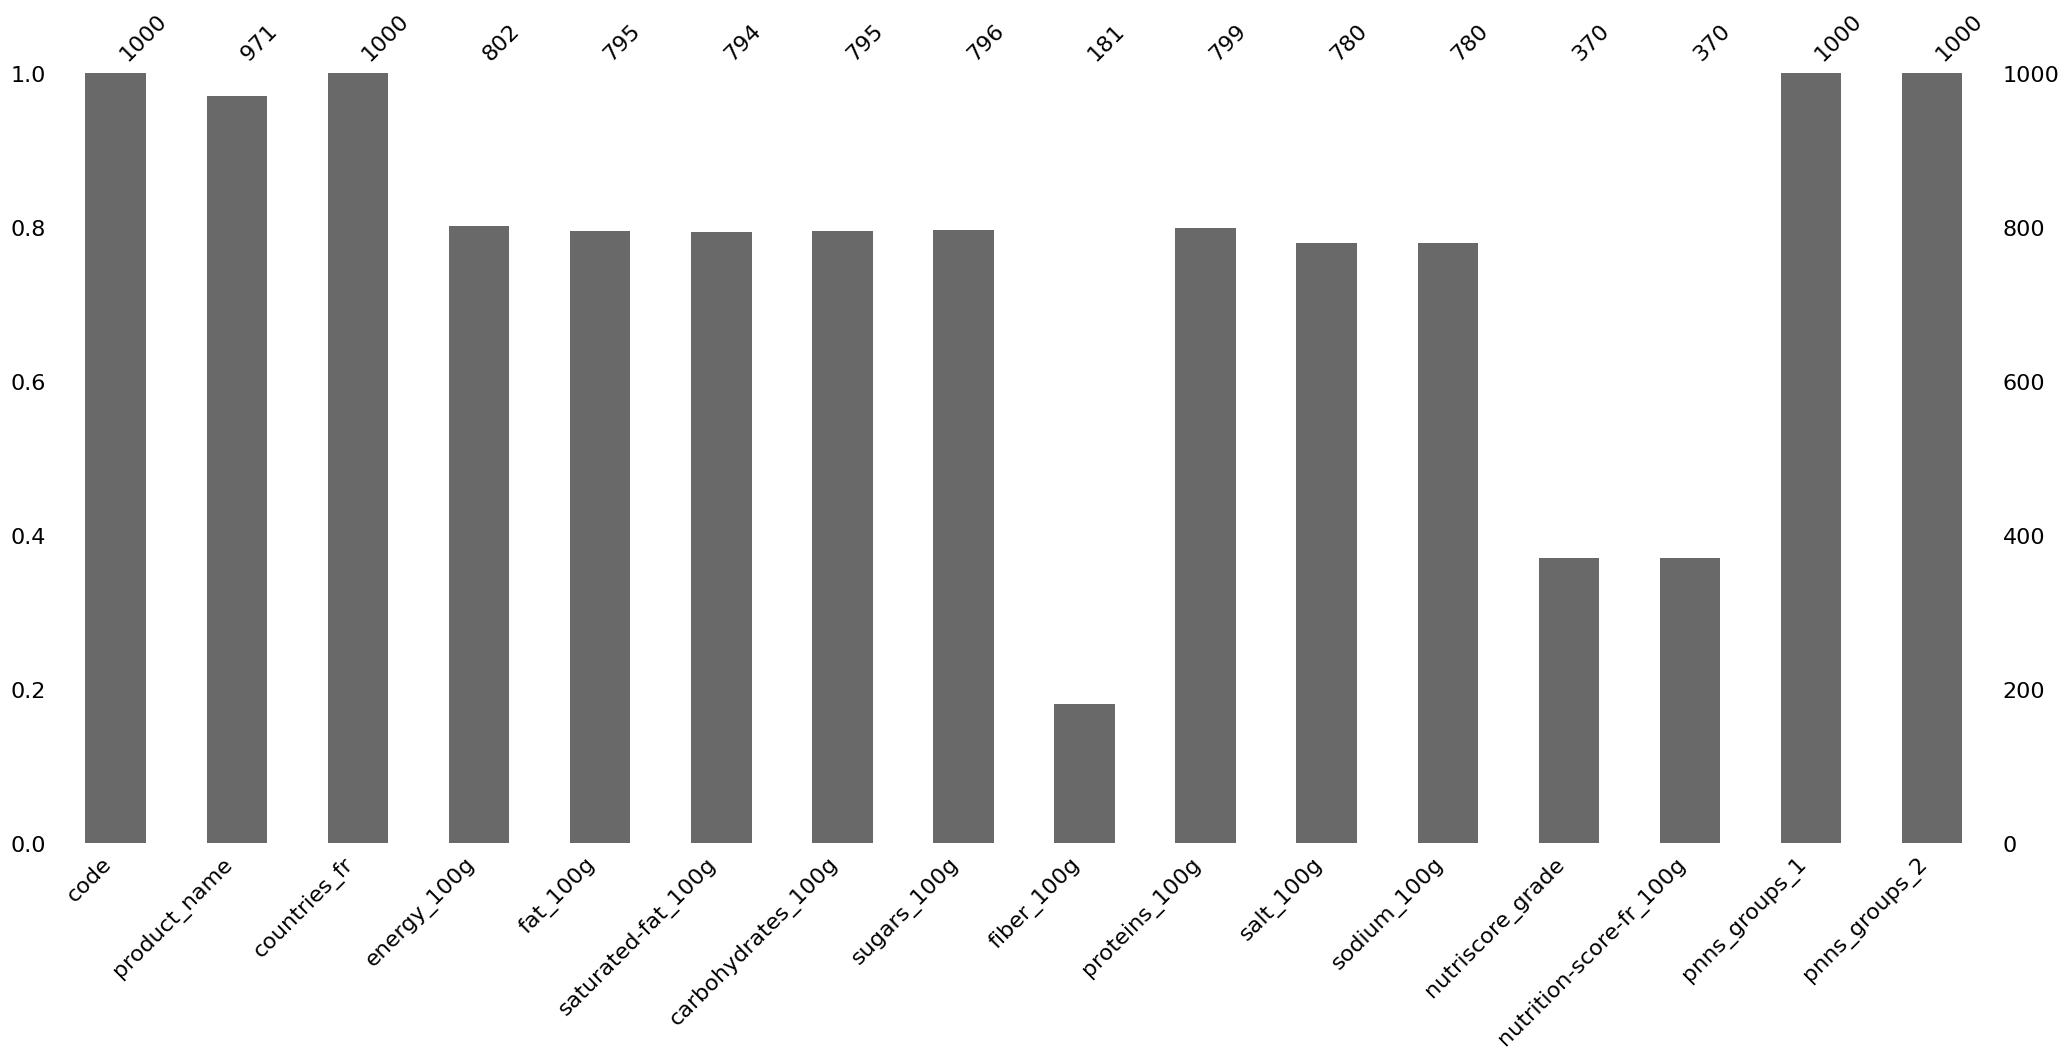

In [49]:
#Déterminons le taux de remplissage
ax=msno.bar(data_food_cleaned.sample(1000))

In [50]:
data_food_cleaned

,code,product_name,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_grade,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2
645238,3760029248001,Caramels tendres au beurre salé au sel de Guér...,France,1717.0,10.9,7.0,73.5,49.3,NaN,3.0,1.7000,0.68000,e,28.0,sugary snacks,sweets
372552,3029330062806,Jacquet Les bouchées créatives à garnir,France,1898.0,15.5,1.3,68.0,2.0,3.0,8.5,1.7526,0.70104,c,10.0,salty snacks,appetizers
446595,3257980112590,Boudoirs,France,1615.0,3.2,1.2,80.4,51.8,1.6,6.9,0.0900,0.03600,d,14.0,sugary snacks,biscuits and cakes
396289,3160181210524,Cookies tout chocolat Biocoop,France,2040.0,25.0,14.0,56.0,33.0,5.5,7.0,0.3810,0.15240,e,19.0,sugary snacks,biscuits and cakes
944480,8002270014901,Eau minérale naturelle avec adjonction de gaz ...,"Belgique,France,Italie,Luxembourg,Suisse",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,0.0,beverages,waters and flavored waters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644452,3760025190069,Gwada original,France,88.0,0.0,0.0,5.0,1.3,NaN,0.0,0.0000,0.00000,NaN,NaN,unknown,unknown
622642,3700048100027,Boulettes au boeuf,France,862.0,15.0,5.7,0.7,0.3,NaN,17.0,0.1200,0.04800,NaN,NaN,unknown,unknown
89389,66200021030,Assaisonnement La Grille (poulet De Barbecue),France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
85567,60383993542,Honey mustard,France,837.0,0.0,0.0,40.0,40.0,NaN,4.0,1.2500,0.50000,NaN,NaN,unknown,unknown


**Gestion du Product_name**
Nous décidons de supprimer tous les produits qui n'ont ni nom, ni catégorie et qui ne pourront donc pas être clairement identifiés

In [51]:
data_food_cleaned = data_food_cleaned[~((data_food_cleaned.product_name.isnull()) 
                        & ((data_food_cleaned.pnns_groups_1 == "unknown")  | (data_food_cleaned.pnns_groups_2 == "unknown")))]

In [52]:
data_food_cleaned['product_name'].isna().sum()

881

In [53]:
data_food_cleaned.loc[data_food_cleaned['product_name'].isna(), 'product_name'] = 'unknown'
data_food_cleaned['product_name'].isna().sum()

0

**Remplissage par un IterativeImputer**
Réalisons une analyse de la corrélation linéaire entre les variables quantitatives afin de déterminer les features éligibles à cette méthode d'imputation

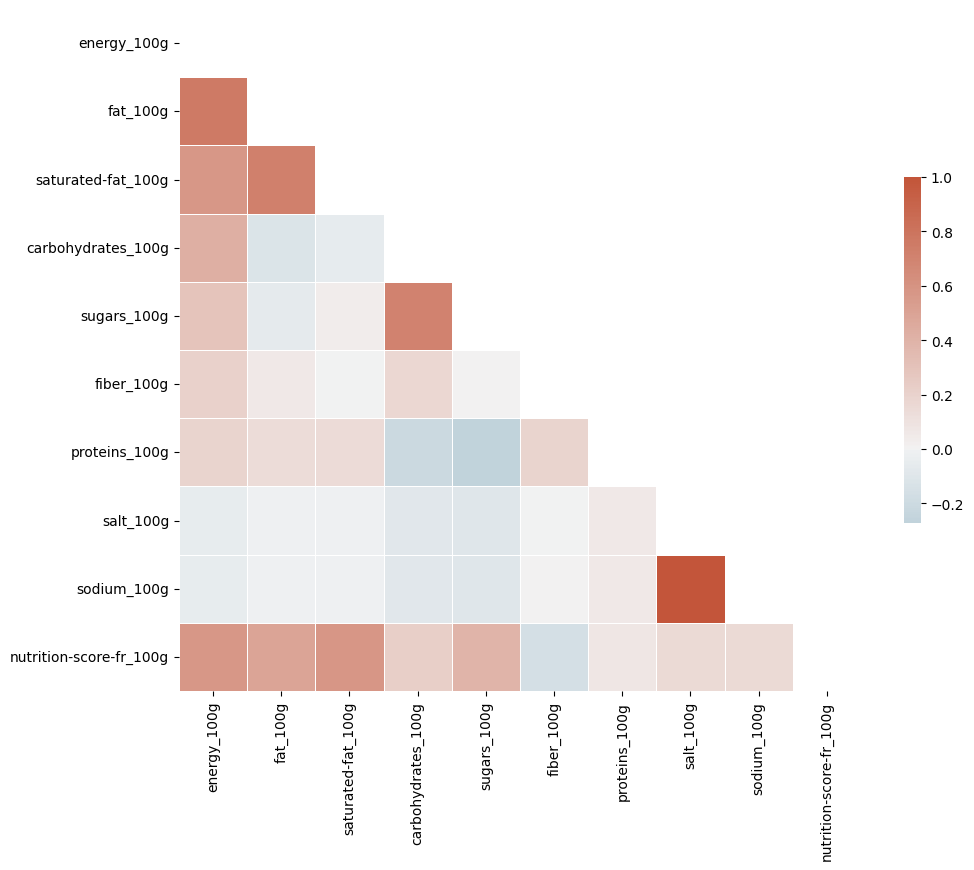

In [54]:
# Calcul de la matrice de corrélation
corr = data_food_cleaned[['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g','nutrition-score-fr_100g']].corr()

# Générer un masque pour le triangle supérieur
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurer la figure matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Générer une palette de couleurs divergentes personnalisée
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dessiner la carte thermique avec le masque et corriger le format d'image
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [55]:
#Utilisons cette méthode d'imputation sur les features 'salt_100g' 'sodium_100g' très corrélées entre elles:
list_corr = ['salt_100g', 'sodium_100g']

In [56]:
data_food_cleaned[list_corr].isna().sum()

salt_100g      126542
sodium_100g    126543
dtype: int64

In [57]:
#définition de la fonction iterative imputer:
def iterative_imputer(df, liste):
    for i in liste:
        x = df[[i]].values
        imputer = IterativeImputer()
        imputer.fit(x)
        x = imputer.transform(x)
        df[i] = x

In [58]:
iterative_imputer(data_food_cleaned, list_corr)

/tmp/ipykernel_20/2474625232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = x
/tmp/ipykernel_20/2474625232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = x


In [59]:
data_food_cleaned[list_corr].isna().sum()

salt_100g      0
sodium_100g    0
dtype: int64

In [60]:
#Remplissage par O
#Fiber_100g
#Nous décidons de remplacer les valeurs manquantes par 'O' car de nombreux produits ne contiennent pas de fibres
data_food_cleaned['fiber_100g'].fillna(method = 'bfill', inplace=True)

/tmp/ipykernel_20/2950199114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_food_cleaned['fiber_100g'].fillna(method = 'bfill', inplace=True)


In [61]:
data_food_cleaned['fiber_100g'].isna().sum()

0

**remplissage par KNNImputer**

In [62]:
knn_features = ['sugars_100g', 'proteins_100g', 'carbohydrates_100g']
knn_features

['sugars_100g', 'proteins_100g', 'carbohydrates_100g']

In [63]:
def knn_imputer(df,liste):
    # On entraine le modèle d'imputation sur un échantillon de données
    sample_data = df[liste].sample(frac=0.25, random_state=1)
    ff = KNNImputer(n_neighbors=5, missing_values=np.nan)
    ff.fit(sample_data)

    # Puis on applique le modèle sur l'ensemble des données
    data_imputed = ff.transform(df[liste])
    df_data_imputed = pd.DataFrame(data_imputed, columns=knn_features)
    
    for col_knn in liste:
        df[col_knn] = df_data_imputed[col_knn].values
    return df

In [64]:
data_food_cleaned=knn_imputer(data_food_cleaned,knn_features)

/tmp/ipykernel_20/1208596834.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_knn] = df_data_imputed[col_knn].values


In [65]:
data_food_cleaned[knn_features].isna().sum()

sugars_100g           0
proteins_100g         0
carbohydrates_100g    0
dtype: int64

**Remplissage par la médiane**
Nous décidons l'imputation par la mediane sur des données homogénes comme celles par les catégories de produits de la variable pnns_group_1.
Définissons la liste de features dont les valeurs manquantes seront imputer par ma mediane:

In [66]:
liste_med=['energy_100g', 'fat_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g']
liste_med

['energy_100g', 'fat_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g']

In [67]:
def remplissage_median(df,liste,var):
    for col in liste:
        df[col] = df.groupby(var)[col].transform(lambda x: x.fillna(x.median()))

In [68]:
remplissage_median(data_food_cleaned, liste_med, 'pnns_groups_1')

/tmp/ipykernel_20/878432663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df.groupby(var)[col].transform(lambda x: x.fillna(x.median()))
/tmp/ipykernel_20/878432663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df.groupby(var)[col].transform(lambda x: x.fillna(x.median()))
/tmp/ipykernel_20/878432663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [69]:
data_food_cleaned[liste_med].isna().sum()

energy_100g                0
fat_100g                   0
saturated-fat_100g         0
nutrition-score-fr_100g    0
dtype: int64

In [70]:
#Gestion du nutrition grade fr
#Ayant précédemment imputer les valeurs manquantes du nutrition-score, nous pouvons imputer celles du nutrition grade en calculant le grade correspondant. 
def calc_nutrigrade(score):
    if score< 0 :
        nutrigrade = "a"
    elif ((score >= 0) & (score < 5)):
        nutrigrade = "b"
    elif ((score >= 5) & (score < 10)) :
        nutrigrade = "c"
    elif ((score >= 10) & (score < 20)) :
        nutrigrade = "d"
    else:
        nutrigrade = "e"    
    return  nutrigrade

In [71]:
indexes=data_food_cleaned.loc[data_food_cleaned['nutriscore_grade'].isna()].index

In [72]:
#définissons la fonction d'imputation des valeurs manquantes
def imputation_nutrigrade(df,index,var_1,var_2):
    for i in index:
        score=df.loc[df[var_1].index==i,var_1].iloc[0]
        df.loc[df[var_2].index==i,var_2]=calc_nutrigrade(score)

In [73]:
imputation_nutrigrade(data_food_cleaned,indexes,'nutrition-score-fr_100g','nutriscore_grade')

In [74]:
data_food_cleaned.isna().sum()

code                       0
product_name               0
countries_fr               0
energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutriscore_grade           0
nutrition-score-fr_100g    0
pnns_groups_1              0
pnns_groups_2              0
dtype: int64

In [75]:
#regardons les données obtenues à la fin 
data_food_cleaned.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000,641042.000000
mean,1142.874362,12.979886,4.839392,27.362176,13.968521,3.351229,8.708830,1.279682,0.512449,10.450070
std,719.620145,15.947784,7.337006,25.145915,18.253929,5.370146,8.883943,4.305194,1.730021,5.457191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,565.000000,1.600000,0.400000,4.500000,1.000000,0.500000,2.550000,0.100000,0.040000,11.000000
50%,1130.000000,7.300000,1.900000,27.235330,8.000000,1.900000,8.000000,0.900000,0.360000,11.000000
75%,1590.000000,19.300000,6.300000,46.000000,13.938277,4.000000,10.000000,1.279682,0.512449,11.000000
max,3768.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,78.740000,40.000000


In [76]:
data_food_cleaned.to_csv('data_food_cleaned.csv', sep='\t', index=False)

**Merci Beaucoup**